# El Dataset de MNIST

In [1]:
import numpy as np
import tensorflow as tf
from skimage import io
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
plt.style.use("ggplot")
session = tf.Session()

C:\Users\sacel\APython3\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001CBCAD57048>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001CBC9684808>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001CBBD4B2B48>)

In [4]:
len(mnist.train.images),len(mnist.test.images)

(55000, 10000)

In [5]:
im_temp = mnist.train.images[0] # Viene en formato unidimensional [784]

(-0.5, 27.5, 27.5, -0.5)

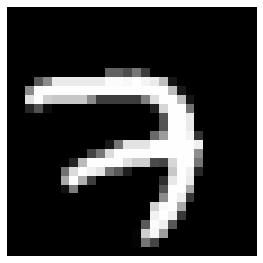

In [6]:
io.imshow(np.reshape(im_temp,(28,28)))
plt.axis("off")

In [7]:
mnist.train.labels[0] # Donde aparece el 1 hace referencia al número

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

(-0.5, 27.5, 27.5, -0.5)

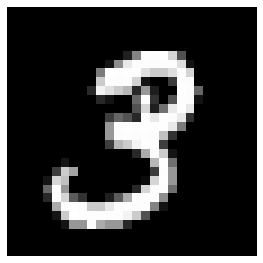

In [8]:
io.imshow(np.reshape(mnist.train.images[1],(28,28)))
plt.axis("off")

# Una Red Neuronal con TensorFlow - v1

- Las imágenes de entrenamiento de MNIST viven en un espacio vectorial de dimensión 784.
- El dataset se puede pensar como 5,500 filas y 784 columnas.
- Cada dato del dataset es un número real entre 0 y 1.

$$y = softmax(w\cdot x + b)$$

In [9]:
dim_input = 784
n_categories = 10

In [10]:
x = tf.placeholder(tf.float32, [None, dim_input])
W = tf.Variable(tf.zeros([dim_input,n_categories]))
b = tf.Variable(tf.zeros([n_categories]))
softmax_args = tf.matmul(x,W)+b
y_hat = tf.nn.softmax(softmax_args)

#### Entrenando la red neuronal

- Loss/Cost $\leftarrow$ minimizar las pérdidas.

In [11]:
from IPython.display import display, Math, Latex

In [12]:
display(Math(r"H_{y'}(\hat{y}) =  - \sum_{i}y_i \log{\hat{y}_i}"))

<IPython.core.display.Math object>

In [13]:
y_ = tf.placeholder(tf.float32,[None,10]) # 0 a 9
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y_hat),
                                             reduction_indices = [1]))

In [14]:
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5)
my_optim = train_step.minimize(cross_entropy)

In [15]:
session.run(tf.global_variables_initializer())

In [16]:
ses = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [17]:
for _ in range(10000):
    batch_x, batch_y = mnist.train.next_batch(150)
    session.run(my_optim,feed_dict={x:batch_x,y_:batch_y})

### Evaluando la red neuronal

In [18]:
correct_predictions = tf.equal(tf.argmax(y_hat,1),tf.argmax(y_,1)) 
accuracy = tf.reduce_mean(tf.cast(correct_predictions,tf.float32))

In [19]:
print(session.run(accuracy, feed_dict = {x:mnist.test.images,
                                        y_:mnist.test.labels}))

0.9239
